In [23]:
import numpy as np
import pickle
import os
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

In [24]:
def score_reporter(results, importances=True):
    bestParams = None
    maxScore = 0
    for params, scores in results.items():
        num_splits = scores['folds']
        accuracy = [scores[f"split{i}_accuracy"] for i in range(num_splits)]
        print(params, np.mean(accuracy))
        
        if (np.mean(accuracy) > maxScore):
            bestParams = params
            maxScore = np.mean(accuracy)
            
    bestScores = results[bestParams]
    num_splits = bestScores['folds']
    accuracy = [bestScores[f"split{i}_accuracy"] for i in range(num_splits)]
    sensitivity = [bestScores[f"split{i}_sensitivity"] for i in range(num_splits)]
    specificity = [bestScores[f"split{i}_specificity"] for i in range(num_splits)]
    precision = [bestScores[f"split{i}_precision"] for i in range(num_splits)]
    f1_score = [bestScores[f"split{i}_f1_score"] for i in range(num_splits)]
    if importances:
        feature_importances = [list(bestScores[f"split{i}_feature_importances"].values()) for i in range(num_splits)]
    
        avg_importances = np.mean(np.array(feature_importances), axis=0)
        feature_names = list(bestScores["split0_feature_importances"].keys())[0]
        mapped_importances = {name: rank for name, rank in zip(feature_names, avg_importances.flatten())}
    
    print(f"The best parameters were {bestParams}")
    print(f"Accuracy for each fold: {accuracy}")
    print(f"Mean accuracy: {np.nanmean(accuracy)}")
    print(f"Std accuracy: {np.nanstd(accuracy)}")
    print(f"Sensitivity for each fold: {sensitivity}")
    print(f"Mean sensitivity: {np.nanmean(sensitivity)}")
    print(f"Std sensitivity: {np.nanstd(sensitivity)}")
    print(f"Specificity for each fold: {specificity}")
    print(f"Mean specificity: {np.nanmean(specificity)}")
    print(f"Std specificity: {np.nanstd(specificity)}")
    print(f"Precision for each fold: {precision}")
    print(f"Mean precision: {np.nanmean(precision)}")
    print(f"Std precision: {np.nanstd(precision)}")
    print(f"F1-score for each fold: {f1_score}")
    print(f"Mean F1-score: {np.nanmean(f1_score)}")
    print(f"Std F1-score: {np.nanstd(f1_score)}")
    if importances:
        print("Average feature importances: ")
        print(mapped_importances)

In [3]:
results = {}

for root, dirs, files in os.walk('./saved_results_0.5/'):
    for result in files:
        if result.endswith(".pickle"):
            with open('./saved_results_0.5/' + result, "rb") as input_file:
                results[os.path.splitext(result)[0]] = pickle.load(input_file)
                
for key in results:
    print(key)
    try:
        score_reporter(results[key])
    except:
        score_reporter(results[key], False)

ada_results
(('n_estimators', 300),) 0.9275428752239288
The best parameters were (('n_estimators', 300),)
Accuracy for each fold: [0.9145591250854409, 0.9473837491505679, 0.9953242835595777, 0.8928972487366648, 0.9938449943474438, 0.9431630170316302, 0.8904954046177987, 0.9927975118677361, 0.929957805907173, 0.9024970273483948, 0.9737215134663614, 0.988940729220667, 0.8270152505446623, 0.9163346613545816, 0.6773067331670823, 0.9702304737516005, 0.9826187717265353, 0.9769604441360167, 0.68403974852971, 0.9700052854122622, 0.9895822694311102, 0.9791603745092117, 0.9946497072481324]
Mean accuracy: 0.9275428752239288
Std accuracy: 0.08733330782830351
Sensitivity for each fold: [0.9136571191365712, 0.9714722363728986, 0.997228637413395, 0.8848199361799118, 0.997867803837953, 0.9385276732939279, 0.8422425032594524, 0.9939204732172199, 0.9263987983477281, 0.9013495276653172, 0.5180722891566265, 0.9931734640294066, 0.6859002169197397, nan, nan, 0.934589800443459, 0.9833129833129833, 0.98992294

In [5]:
moving_accs = {}

for key in results:
    bestParams = None
    maxScore = 0
    for params, scores in results[key].items():
        num_splits = scores['folds']
        accuracy = [scores[f"split{i}_accuracy"] for i in range(num_splits)]

        if (np.mean(accuracy) > maxScore):
            bestParams = params
            maxScore = np.mean(accuracy)
    bestScores = results[key][bestParams]
    if key == 'cb_results':
        moving_accs['CatBoost'] = [bestScores[f"split{i}_subject_acc"] for i in range(num_splits)]
    elif key == 'xg_results':
        moving_accs['XGBoost'] = [bestScores[f"split{i}_subject_acc"] for i in range(num_splits)]
    elif key == 'lg_results':
        moving_accs['LightGBM'] = [bestScores[f"split{i}_subject_acc"] for i in range(num_splits)]
    elif key == 'ada_results':
        moving_accs['AdaBoost'] = [bestScores[f"split{i}_subject_acc"] for i in range(num_splits)]
    elif key == 'knn_results':
        moving_accs['KNN (k=9)'] = [bestScores[f"split{i}_subject_acc"] for i in range(num_splits)]
    elif key == 'dt_results':
        moving_accs['Decision Tree'] = [bestScores[f"split{i}_subject_acc"] for i in range(num_splits)]
    elif key == 'lda_results':
        moving_accs['LDA'] = [bestScores[f"split{i}_subject_acc"] for i in range(num_splits)]
    elif key == 'qda_results':
        moving_accs['QDA'] = [bestScores[f"split{i}_subject_acc"] for i in range(num_splits)]
    elif key == 'lr_results':
        moving_accs['QDA'] = [bestScores[f"split{i}_subject_acc"] for i in range(num_splits)]
    elif key == 'svc_results':
        moving_accs['QDA'] = [bestScores[f"split{i}_subject_acc"] for i in range(num_splits)]
    elif key == 'rf_results':
        moving_accs['Random Forest'] = [bestScores[f"split{i}_subject_acc"] for i in range(num_splits)]
        
with open(f'moving_accs.pickle', 'wb') as handle:
    pickle.dump(moving_accs, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [25]:
with open(f'moving_accs.pickle', 'rb') as handle:
    moving_accs = pickle.load(handle)

  0%|          | 0/9 [00:00<?, ?it/s]

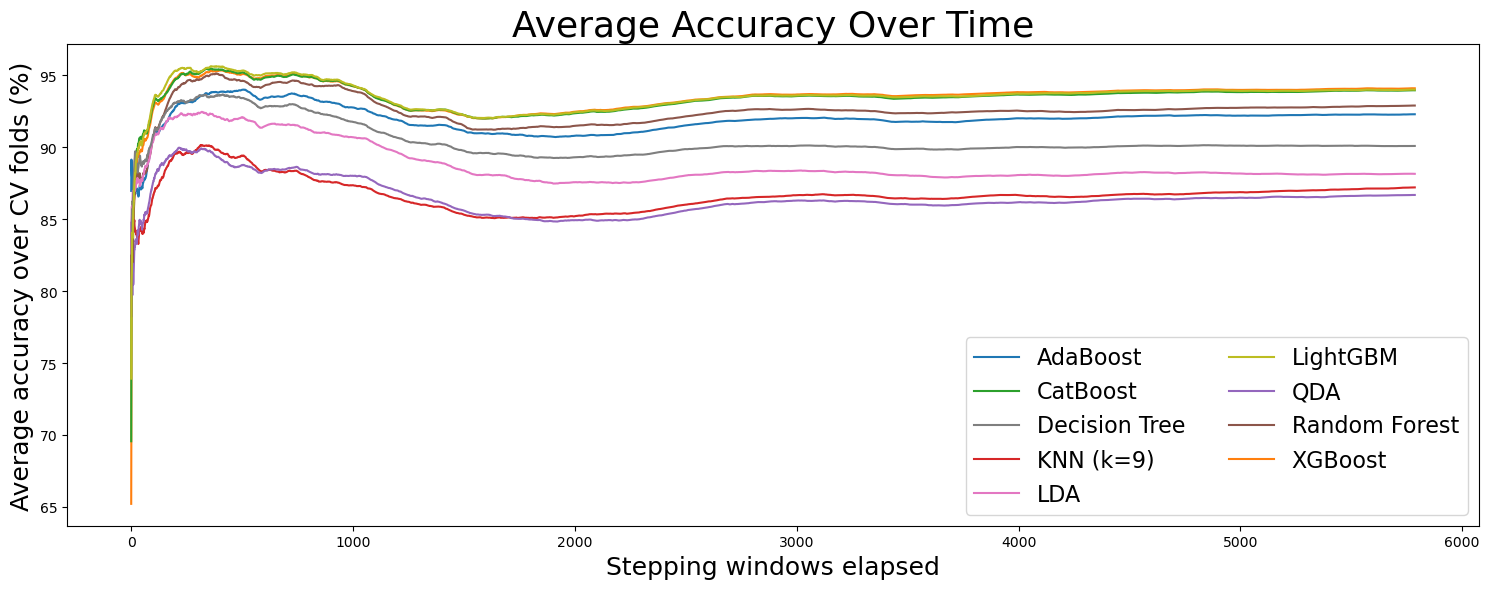

In [33]:
fig, ax = plt.subplots()
fig.set_figwidth(15)
fig.set_figheight(6)
fig.patch.set_alpha(0)

for classifier in tqdm(moving_accs):
    avg_list = [sum(sub_list) * 100 / len(sub_list) for sub_list in zip(*moving_accs[classifier])]
    ax.plot(avg_list, label = classifier)
    
ax.set_title("Average Accuracy Over Time", fontsize=26)
ax.set_ylabel("Average accuracy over CV folds (%)", fontsize=18)
ax.set_xlabel("Stepping windows elapsed", fontsize=18)
handles, labels = ax.get_legend_handles_labels()
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
ax.legend(handles, labels, ncol=2, fontsize=16)
fig.set_tight_layout(True)
fig.savefig("moving_acc_plot.png", facecolor=fig.get_facecolor())